In [1]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [4]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [5]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [6]:
#df = df[:5000]
#df.shape

In [7]:
#df.info()

In [8]:
#df.head()

In [9]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

679

In [10]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [11]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1614355,80,5012479,6,4,600,4149,600,0,100.0,244.948974,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614177,80,5009673,4,4,536,1840,536,0,134.0,268.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612116,80,42,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [12]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735170,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,32,2217.0,0.0,2217,2217,5024984.0,0.0,5024984,5024984,Heartbleed
2735305,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735865,444,24719667,590,436,7442,1636683,5792,0,12.613559,238.708658,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735317,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735550,444,119259886,2782,2091,12264,7879536,4344,0,4.408339,83.390470,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735762,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735215,444,119262215,2792,2110,13712,7878135,5792,0,4.911175,110.376448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735853,444,119296592,2797,2006,13712,7878088,5792,0,4.902395,110.277907,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735249,444,119261118,2794,2130,12264,7879536,4344,0,4.389406,83.211635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [13]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1321496,444,18897509,8,0,7366,0,1460,6,920.750000,634.234015,...,20,9.296999e+06,0.000000e+00,9296999,9296999,9600510.0,0.000000e+00,9600510,9600510,Infiltration
1393176,444,67917167,20,20,3738,120,705,6,186.900000,227.230210,...,20,5.664775e+05,1.173161e+04,574773,558182,33100000.0,3.060000e+07,54800000,11400000,Infiltration
1310743,444,78233714,48,52,12042,586,1460,0,250.875000,422.794534,...,20,2.024844e+06,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979,Infiltration
1315648,444,119382036,1157,1157,319630,6942,1271,6,276.257563,265.155894,...,20,8.742789e+06,8.670544e+06,21700000,3735603,13600000.0,9.693511e+06,24800000,5373451,Infiltration
1315493,444,119992821,2252,2250,929308,13500,1272,6,412.658970,304.963240,...,20,3.430000e+07,1.140000e+07,42400000,26200000,19400000.0,1.550000e+07,30300000,8400626,Infiltration
1317024,444,69365637,1031,1031,307939,6186,1271,6,298.679922,270.071527,...,20,1.640000e+07,0.000000e+00,16400000,16400000,13900000.0,0.000000e+00,13900000,13900000,Infiltration
1384003,444,101086101,25,25,5821,150,1181,6,232.840000,369.048515,...,20,5.698800e+05,1.494452e+04,582609,553425,32900000.0,1.910000e+07,55000000,21800000,Infiltration
1306253,444,5005212,15,15,0,90,0,0,0.000000,0.000000,...,28,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1299546,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1301573,444,2030,2,0,12,0,6,6,6.000000,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration


In [14]:
df_label = df['Label']

In [15]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [16]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [17]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136471
DoS Hulk             115792
PortScan              79553
DDoS                  63733
DoS GoldenEye          5086
FTP-Patator            3949
SSH-Patator            2988
DoS slowloris          2920
DoS Slowhttptest       2752
Web Attack             1132
Bot                     996
Name: Label, dtype: int64

In [18]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'DoS Slowhttptest',
       'DoS slowloris', 'DoS GoldenEye', 'Bot', 'FTP-Patator',
       'SSH-Patator', 'Web Attack'], dtype=object)

In [19]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [20]:
len (label_names)

11

In [21]:
data.shape

(1415372, 76)

# Data Imbalance

In [22]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [23]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [24]:
X = data.values
y = encode_label(df_label.values)

del data

In [25]:
# normalization
def normalize(data):
    data = data.astype(np.float32)       
    eps = 1e-15
    mask = data==-1
    data[mask]=0
    mean_i = np.mean(data,axis=0)
    min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
    max_i = np.max(data,axis=0)
    r = max_i-min_i+eps
    data = (data-mean_i)/r  # zero centered 
    #deal with missing features -1
    data[mask] = 0        
    return data

In [26]:
X = normalize(X)

In [27]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [28]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [30]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


# CNN Model

In [31]:
from torch.utils.data import TensorDataset
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn as nn

from tqdm import tqdm
from torch.autograd import Variable

In [32]:
epochs = 10
lr= 0.01
milestones = [50, 75]
gamma = 0.1
batch_size = 128
input_dim = X_train.shape[1]
num_class = len(np.unique(df_label))
accuracies = {}

In [33]:
np.unique(df_label)

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'PortScan',
       'SSH-Patator', 'Web Attack'], dtype=object)

In [34]:
num_class

11

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))
        #leaky_relu
        #h = F.leaky_relu(self.conv1(x))
        #h = F.leaky_relu(self.conv2(h))
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)
    

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)

In [36]:
def accuracy(y, t):
    pred = y.data.max(1, keepdim=True)[1]
    acc = pred.eq(t.data.view_as(pred)).cpu().sum()
    return acc

In [37]:
print("Generating Model ...")
print("-" * 60)

tensor_x_train = torch.stack([torch.Tensor(i) for i in X_train]).to(device)
tensor_y_train = torch.LongTensor(y_train).to(device)

train_data = TensorDataset(tensor_x_train,tensor_y_train)     
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)      


tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device)

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)      

model = MnistCNN(input_dim=input_dim  , num_classes=num_class)
print (model)

#model = CifarCNN(num_classes=num_class)
#print (model)


Generating Model ...
------------------------------------------------------------
MnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=11, bias=True)
)


In [38]:
train_accu = []
train_losses = []
eval_losses=[]
eval_accu=[]

cudnn.benchmark = True
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.001)
scheduler = lr_scheduler.MultiStepLR(opt, milestones=milestones, gamma=gamma)
loss_func = nn.CrossEntropyLoss().to(device)

print_str = "\t".join(["{}"] + ["{:.6f}"] * 4)
print("\t".join(["{:}"] * 5).format("Epoch", "TrainLoss", "TestLoss", "TrainAcc.", "TestAcc."))
for e in range(epochs):
    train_loss, train_acc, train_n = 0, 0, 0
    test_loss, test_acc, test_n = 0, 0, 0

    model.train()
    for x, t in tqdm(train_loader, total=len(train_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))        
        y = model(x)                
        loss = loss_func(y, t)
        opt.zero_grad()
        loss.backward()
        opt.step()
        train_loss += loss.item() * t.size(0)
        train_acc += accuracy(y, t)        
        train_n += t.size(0)
    
    model.eval()
    for x, t in tqdm(test_loader, total=len(test_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))
        y = model(x)
        loss = loss_func(y, t)

        test_loss += loss.item() * t.size(0)
        test_acc += accuracy(y, t)     
        
        test_n += t.size(0)
    scheduler.step()
    
    running_loss_train = train_loss / train_n
    accu_train = train_acc / train_n * 100
   
    train_accu.append(accu_train)
    train_losses.append(running_loss_train)
    
    
    running_loss_test =  test_loss / test_n
    accu_test =  test_acc / test_n * 100
    
    eval_losses.append(running_loss_test)
    eval_accu.append(accu_test)
    
    #print(print_str.format(e, train_loss / train_n, test_loss / test_n,
    #                       train_acc / train_n * 100, test_acc / test_n * 100)  , flush=True)
    
    print(print_str.format(e, running_loss_train , running_loss_test,   accu_train  ,accu_test )  , flush=True)
     
torch.save({"state_dict": model.state_dict()},"/content/drive/MyDrive/IDS(attacks&Defense)/models/MnistCNN.tar") #MnistCNN.tar

Epoch	TrainLoss	TestLoss	TrainAcc.	TestAcc.


  0%|          | 0/8847 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
                                                    

0	0.284858	0.178836	91.167160	94.455887


1	0.169702	0.157357	94.614044	95.022873


2	0.156316	0.150958	94.981613	95.342224


3	0.150029	0.147047	95.158340	95.236954


4	0.146602	0.147603	95.263962	94.625458


5	0.144638	0.142298	95.302116	95.392387


6	0.143175	0.140857	95.350067	95.503311


7	0.142561	0.137754	95.364113	95.501549


8	0.141680	0.142387	95.383011	95.511086


9	0.141240	0.142013	95.385048	95.431244


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

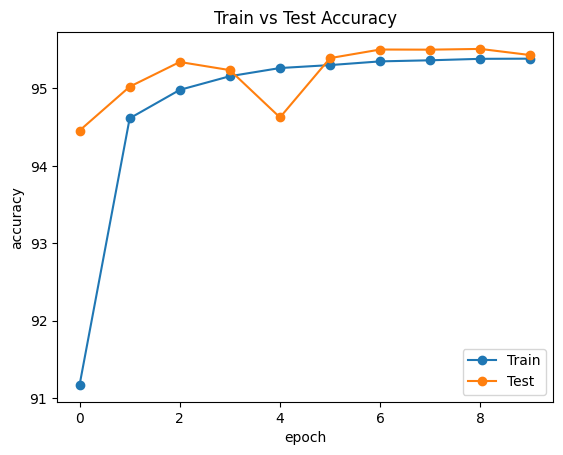

In [40]:
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
 
plt.show()

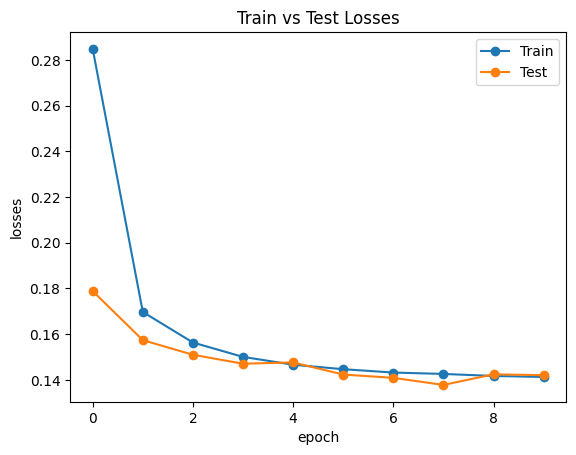

In [41]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
 
plt.show()

In [42]:
y_true = []
y_pred = []

for data in tqdm(test_loader):
    images,labels=data[0].to(device),data[1]  
    y_true.extend(labels.numpy())

    outputs=model(images)

    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())

  0%|          | 0/2212 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 2212/2212 [00:15<00:00, 146.95it/s]


In [43]:
print(y_pred)
print(y_true)

[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 8, 0, 0, 0, 2, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 8, 4, 0, 0, 0, 0, 0, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 8, 0, 4, 0, 0, 0, 0, 0, 8, 0, 4, 0, 0, 0, 0, 8, 0, 4, 0, 7, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 4, 2, 0, 0, 8, 0, 0, 8, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 8, 0, 4, 0, 0, 0, 4, 8, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 8, 8, 0, 8, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 8, 0, 8, 

In [44]:
from sklearn.metrics import precision_score, recall_score ,f1_score

print('Precision is: ', precision_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))* 100)
print('Recall is: ', recall_score(y_true, y_pred , average='weighted', labels=np.unique(y_pred))* 100)
print('F1 is: ', f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))* 100)

Precision is:  95.3995547707585
Recall is:  95.57706526853532
F1 is:  95.26602046060968


In [45]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)

In [46]:
cf_matrix

array([[221672,      0,    421,     27,   1214,     15,      5,     15,
          4130,      0,      0],
       [   176,      0,      0,      0,      0,      0,      0,      0,
            14,      0,      0],
       [   504,      0,  11686,      1,    489,      0,      0,      0,
             0,      0,      0],
       [   232,      0,    125,    523,     93,      2,      2,      0,
             0,      0,      0],
       [  2714,      0,    257,      5,  20354,      0,      0,      0,
             0,      0,      0],
       [   308,      0,      4,     19,      7,     90,    100,      9,
             6,      0,      0],
       [    96,      0,      3,      7,     10,     41,    248,      6,
           196,      1,      0],
       [   453,      0,      1,      1,      1,      1,      6,     10,
           290,      0,      0],
       [   114,      0,      0,      1,      6,      1,      3,      0,
         15576,      0,      0],
       [   556,      0,      0,      0,      0,      0,

In [47]:
label_names

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'DoS Slowhttptest',
       'DoS slowloris', 'DoS GoldenEye', 'Bot', 'FTP-Patator',
       'SSH-Patator', 'Web Attack'], dtype=object)

In [48]:
class_names = (['BENIGN', 'DoS Hulk', 'DDoS', 'FTP-Patator', 'PortScan',
       'DoS GoldenEye', 'SSH-Patator', 'Web Attack', 'DoS slowloris',
       'DoS Slowhttptest', 'Bot'])      

# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

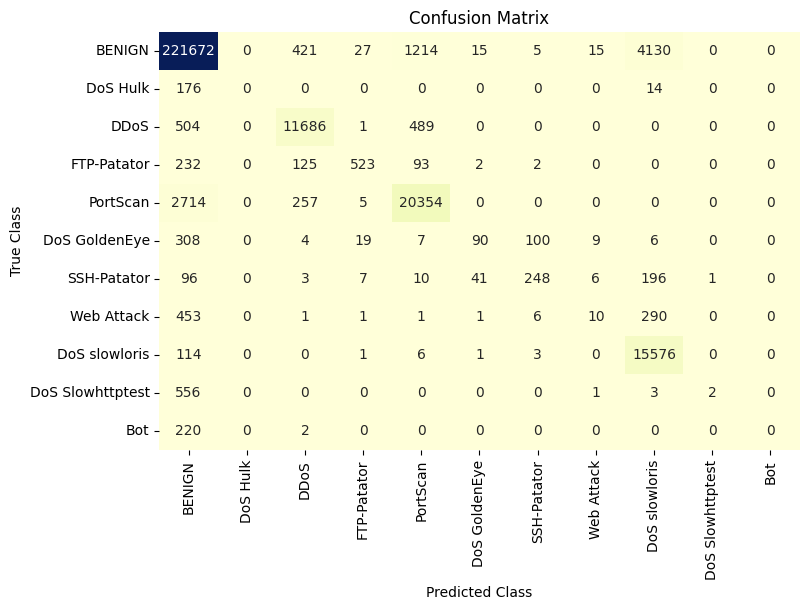

In [49]:
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")

plt.title("Confusion Matrix"), plt.tight_layout()

plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()